In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [3]:
sys.path.append('code')

## Load data

In [4]:
with open("data/2020-09-08_sentences.txt") as sfile:
    sents = sfile.readlines()
sents = [x.replace("\n", "") for x in sents]

with open("data/2020-09-14_embeddings_mean.csv") as efile:
    embs = efile.readlines()
embs = [[float(y) for y in x.replace("\n", "").split(";")] for x in embs]

with open("data/2020-09-22_properties.csv") as pfile:
    props = pfile.readlines()
props = [[int(y) for y in x.replace("\n", "").split(";")] for x in props]

In [5]:
# create dataset
X, y = np.array(props), np.array(embs)
# summarize shape
print(X.shape, y.shape)
inputdim = X.shape[1]
outputdim = y.shape[1]
print(inputdim)
print(outputdim)

(6200, 87) (6200, 768)
87
768


## MLP for regression

### Define model

In [9]:
from utils import *

In [10]:
net = Net(inputdim, outputdim)     # define the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

X_train, X_test, y_train, y_test = train_test_split(props, embs, test_size=0.20, random_state=42)

In [11]:
# prep for pytorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

### Train model

In [ ]:
# train the network
for t in range(2000):
    prediction = net(X_train)     # input x and predict based on x
    loss = loss_func(prediction, y_train)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

### Save model

In [ ]:
emptymodel = Net(inputdim, outputdim)
model = my_load_model("test", emptymodel)

In [ ]:
preds = model(X_test)

## RF for regression

In [6]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

### Train single model

In [12]:
# define model
model_rf = RandomForestRegressor(n_estimators=50)
# fit model
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [64]:
features = np.sort(model_rf.feature_importances_)

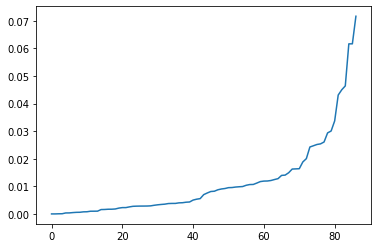

In [67]:
plt.plot(features)

In [68]:
features

array([0.00000000e+00, 0.00000000e+00, 4.55254668e-05, 6.59742230e-05,
       3.50191142e-04, 3.61756148e-04, 4.82727339e-04, 5.70521139e-04,
       5.95474023e-04, 7.49246668e-04, 7.81936179e-04, 9.73928469e-04,
       9.84688837e-04, 1.00152885e-03, 1.57637382e-03, 1.61007471e-03,
       1.69565359e-03, 1.70547757e-03, 1.78813170e-03, 2.10240080e-03,
       2.28650996e-03, 2.29084421e-03, 2.54667186e-03, 2.75543303e-03,
       2.81142826e-03, 2.83841382e-03, 2.84298886e-03, 2.86109571e-03,
       2.92043386e-03, 3.13279470e-03, 3.30145369e-03, 3.43080612e-03,
       3.53738409e-03, 3.75494566e-03, 3.80010480e-03, 3.80694778e-03,
       4.00731790e-03, 4.05752395e-03, 4.24187306e-03, 4.32178324e-03,
       5.01881370e-03, 5.33603705e-03, 5.54619634e-03, 6.99232564e-03,
       7.58672776e-03, 8.12140555e-03, 8.22419058e-03, 8.74854259e-03,
       9.03874121e-03, 9.20653731e-03, 9.51638732e-03, 9.56155073e-03,
       9.73678012e-03, 9.84033413e-03, 9.92167378e-03, 1.03807539e-02,
      

In [14]:
preds_rf = model_rf.predict(X_test)

In [15]:
preds_rf

array([[-0.21276036, -0.17013222,  0.19216261, ..., -0.16317337,
         0.24229372, -0.10806679],
       [-0.07424421, -0.12804609,  0.05910014, ..., -0.11487924,
         0.21340366, -0.00523934],
       [-0.07424421, -0.12804609,  0.05910014, ..., -0.11487924,
         0.21340366, -0.00523934],
       ...,
       [-0.07424421, -0.12804609,  0.05910014, ..., -0.11487924,
         0.21340366, -0.00523934],
       [-0.07424421, -0.12804609,  0.05910014, ..., -0.11487924,
         0.21340366, -0.00523934],
       [-0.20011401, -0.14221996,  0.15098258, ..., -0.07115534,
         0.22269656, -0.00498262]])

In [ ]:
## Eval baseline + pred distances

## Compare baselines and prediction

In [28]:
from FImp import *

In [50]:
baselines100 = []
for i in range(100):
    baseline = pd.read_csv("data/2020-11-17_rand_embs_noise"+str(i)+".csv", sep=",", index_col=None, header=0, names=None)
    baselines100.append(baseline)

In [52]:
scores_bl = []
for bl in baselines100:
    scores_bl.append(AvCorrCoef(y_test, bl))

In [31]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [53]:
score_predrf = AvCorrCoef(y_test, preds_rf)

In [54]:
print(np.mean(scores_bl))
print(np.std(scores_bl))

print(score_predrf)

8.180866964184471e-05
0.0009816309111870146
0.1335788484731206


In [55]:
ztest ,pval = stests.ztest(scores_bl, x2=None, value=score_predrf)
print(float(pval))
print(ztest)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
-1353.1346250574434
reject null hypothesis


## Import baselines

In [17]:
import pandas as pd

In [18]:
# load baselinedata
baseline = pd.read_csv("data/2020-10-02_baseline.csv", sep=",", index_col=None, names=None, header=None)

In [19]:
baseline

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.183330,-0.338543,0.394645,0.208696,0.272407,0.262314,0.176081,0.452315,-0.088711,-0.156307,...,0.093218,0.102018,0.116440,-0.374251,-0.039406,-0.588085,0.001833,-0.034762,0.147428,0.430758
1,-0.198364,-0.138444,0.031957,-0.132682,0.392281,-0.027410,-0.210383,0.430158,-0.022197,0.300843,...,0.025187,-0.009398,-0.151384,-0.085963,0.343738,-0.428683,-0.063570,-0.115330,-0.050759,-0.008490
2,0.010989,0.080653,-0.022944,0.170160,0.222607,-0.033463,0.099859,0.325499,0.135997,0.050320,...,0.106332,-0.312108,0.053406,-0.329611,0.262430,-0.467402,0.022986,0.059246,0.192895,-0.357010
3,0.088568,-0.089175,0.358509,0.088131,0.491026,-0.221425,0.074407,0.517344,-0.409624,-0.197844,...,0.068139,0.097460,-0.080508,-0.232688,-0.128343,-0.240722,0.304749,-0.078456,-0.203725,0.140829
4,-0.310554,-0.041779,0.199236,0.038224,0.242709,-0.190991,-0.492122,0.290447,0.209475,0.507692,...,-0.038870,0.077799,0.122043,0.183782,0.312981,-0.260714,-0.365845,-0.090030,0.364407,0.203804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,-0.035068,-0.101342,-0.038527,-0.515978,0.422511,-0.035562,-0.140601,0.393623,0.059193,0.195277,...,0.041091,-0.124184,0.012155,-0.116769,-0.036674,0.065368,0.021741,-0.214591,0.231099,-0.124138
1236,-0.445690,-0.025927,0.397435,0.450872,0.467972,-0.463584,-0.308271,0.145245,0.075171,0.117758,...,-0.158808,-0.019649,0.467825,-0.628538,0.172530,0.004418,0.297175,0.106137,-0.103812,-0.019936
1237,0.013183,-0.134107,-0.160256,-0.159644,0.420977,0.159681,-0.192252,0.340523,-0.044632,-0.207104,...,-0.057211,0.136079,-0.130153,-0.338041,0.330491,-0.188173,-0.160723,-0.170621,0.366945,0.061022
1238,-0.682124,-0.276185,0.089449,0.211166,0.439895,-0.219995,0.308842,0.747637,-0.006205,0.247991,...,-0.231789,0.061435,0.391486,-0.378326,0.034358,-0.311263,0.024432,-0.245886,0.068491,0.264692


In [ ]:
from FImp import *

In [ ]:
# pred
mse_pred = MeanSqErr(y_test, preds_rf)
mse_baseline = MeanSqErr(y_test, baselinedata)
(mse_baseline, mse_pred, MeanSqErr(y_test, y_test))

In [ ]:
# btw -1, +1 (coef correl)
avcorref_pred = AvCorrCoef(y_test, preds_rf)
avcorref_baseline = AvCorrCoef(y_test, baselinedata)
(avcorref_baseline, avcorref_pred, AvCorrCoef(y_test, y_test))

In [ ]:
avrelerr_pred = AvRelErr(y_test, preds_rf)
avrelerr_baseline = AvRelErr(y_test, baselinedata)
( avrelerr_baseline, avrelerr_pred, AvRelErr(y_test, y_test))

In [ ]:
avrootmeansqerr_pred = AvRootMeanSqErr(y_test, preds_rf)
avrootmeansqerr_baseline = AvRootMeanSqErr(y_test, baselinedata)
(avrootmeansqerr_baseline, avrootmeansqerr_pred, AvRootMeanSqErr(y_test, y_test))

In [ ]:
avrelrootmeansqerr_pred = AvRelRootMeanSqErr(y_test, preds_rf)
avrelrootmeansqerr_baseline = AvRelRootMeanSqErr(y_test, baselinedata)
avrelrootmeansqerr_opti = AvRelRootMeanSqErr(y_test, y_test)


(avrelrootmeansqerr_baseline, avrelrootmeansqerr_pred, avrelrootmeansqerr_opti)

In [ ]:
baselinedata = baseline.values.tolist()

### Train with optiRF

In [ ]:
from FImp import optiRF

In [ ]:
opti_model = optiRF(X_train, y_train)

## Evaluate predictions

In [ ]:
l = np.sort(model_rf.feature_importances_)

In [ ]:
# features names in right order
names = ['Same-Unit', 'elaboration-additional-e', 'List', 'elaboration-object-attribute-e',
                'condition', 'attribution', 'elaboration-additional', 'circumstance',
                'purpose', 'elaboration-general-specific', 'restatement-e', 'reason',
                'elaboration-part-whole-e', 'rhetorical-question', 'manner', 'concession',
                'consequence-n', 'temporal-same-time', 'restatement', 'elaboration-object-attribute',
                'antithesis', 'consequence-s', 'definition', 'Contrast', 'result', 'means', 'attribution-n',
                'interpretation-s', 'temporal-after', 'example-e', 'result-e', 'explanation-argumentative',
                'elaboration-general-specific-e', 'elaboration-set-member-e', 'attribution-e',
                'evaluation-s', 'circumstance-e', 'background', 'evidence', 'comment-e', 'purpose-e',
                'interpretation-n', 'condition-e', 'temporal-before', 'comment', 'elaboration-part-whole',
                'comparison', 'contingency', 'hypothetical', 'analogy-e', 'evaluation-s-e',
                'elaboration-set-member', 'temporal-after-e', 'comparison-e', 'means-e', 'example',
                'evidence-e', 'cause', 'preference', 'enablement', 'question-answer-s',
                'explanation-argumentative-e', 'definition-e', 'antithesis-e', 'summary-n',
                'analogy', 'interpretation-s-e', 'concession-e', 'consequence-s-e', 'manner-e',
                'preference-e', 'reason-e', 'temporal-same-time-e', 'consequence-n-e',
                'enablement-e', 'evaluation-n', 'temporal-before-e', 'otherwise', 'question-answer-n',
                'conclusion', 'dr_exist', 'nb_distinct_rel', 'nb_nuc', 'nb_sat', 'nb_root'
                'width', "height", "multinuc"]

len(names)

feat_imp = model_rf.feature_importances_
    
sVals = sorted(feat_imp)  
Z = [x for _,x in sorted(zip(feat_imp,names))]
for feat, name in zip(sVals, Z):
    print(str(feat)+"  "+name)

In [ ]:
l = np.sort(model_rf.feature_importances_)
plt.plot(l)
plt.show()

In [ ]:
preds_rf = model_rf.predict(X_test)

In [ ]:
from scipy.spatial import distance

In [ ]:
from FImp import rsqq, rsq, mse

In [ ]:
cos_dists = []
rsq_dists = []
mse_dists = []

for true, pred in zip(preds_rf, y_test):
    cos_dists.append(distance.cosine(true, pred))
    rsq_dists.append(rsqq(true, pred))
    mse_dists.append(mse(true, pred))

In [ ]:
print(np.min(rsq_dists))
print(np.mean(rsq_dists))
print(np.max(rsq_dists))

In [ ]:
print(np.min(rsq_dists))
print(np.mean(rsq_dists))
print(np.max(rsq_dists))

In [ ]:
print(np.min(cos_dists))
print(np.mean(cos_dists))
print(np.max(cos_dists))

In [ ]:
print(np.min(mse_dists))
print(np.mean(mse_dists))
print(np.max(mse_dists))

In [ ]:
for x, y in zip(preds_rf[0], y_test[0]):
    print(str(x)+"   "+str(float(y)))

In [ ]:
cos_dists = []
rsq_dists = []


for true, pred in zip(preds_rf, y_test):
    #cos_dists.append(distance.cosine(true, pred))
    rsq_dists.append(rsqq(true, pred))


print(np.min(rsq_dists))
print(np.mean(rsq_dists))
print(np.max(rsq_dists))

In [ ]:
from FImp import *

In [ ]:
pred_X = net(X_test)

In [ ]:
pred_X = pred_X.tolist()

In [ ]:
mean_mse = []

In [ ]:
for x, y in zip(y_test, pred_X):
    x = [int(b) for b in x]
    y = [int(a) for a in y]
    cur_mse = mse(list(x), list(y))
    mean_mse.append(cur_mse)

In [ ]:
mean_mae = []

In [ ]:
for x, y in zip(y_test, pred_X):
    x = [int(b) for b in x]
    y = [int(a) for a in y]
    cur_mae = mae(list(x), list(y))
    mean_mae.append(cur_mae)

In [ ]:
print(np.mean(mean_mae))

In [ ]:
np.sqrt(np.mean(mean_mae))

In [ ]:
print(np.mean(mean_mse))

In [ ]:
np.sqrt(np.mean(mean_mse))

In [ ]:
dbg_pred = pred_X[100]
dbg_true = y_test[100]


print(mse(dbg_pred, dbg_true))
print("===============")
for x, y in zip(dbg_pred, dbg_true):
    print(str(x)+ "\t"+ str(y))